# Understanding Hodgkin-Huxley Model

###### Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from concept.hh_model import HodgkinHuxleyNeuron
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

###### Post-Synaptic Function

In [2]:
def I_syn(cur_V, par_V):
    weight = 0.1
    tau = 30
    I_syn = weight * np.exp(-(cur_V - par_V) / tau)
    return I_syn

## Single Neuron

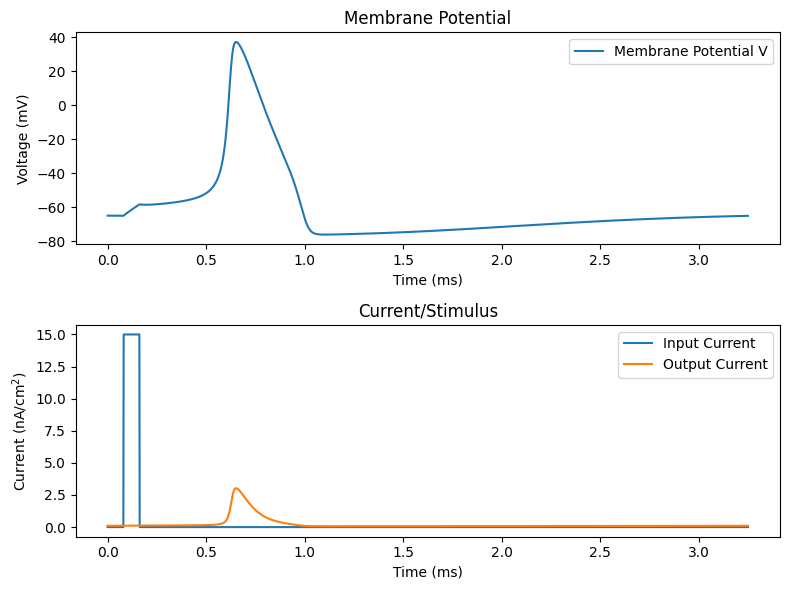

In [3]:
T = 20.0
dt = 0.01
time = np.arange(0, T, dt)

# Neuron
neuron = HodgkinHuxleyNeuron()

# Stimulus
I_inp = np.zeros(len(time))
I_inp[int(0.5/dt):int(1.0/dt)] = 15.0

# Record data
V_record = []
I_out = np.zeros(len(time))

for i, t in enumerate(time):
    neuron.step(I_inp[i])
    V_record.append(neuron.V)
    I_out[i] = I_syn(-65.0, neuron.V)


# Plot
plt.figure(figsize=(8, 6))
    
# Membrane potential V
plt.subplot(2, 1, 1)
plt.plot(time / time[615], V_record, label='Membrane Potential V')
plt.title('Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()

# Currents
plt.subplot(2, 1, 2)
plt.plot(time / time[615], I_inp, label='Input Current')
plt.plot(time / time[615], I_out, label='Output Current')
plt.title('Current/Stimulus')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA/cm$^2$)')
plt.legend()
plt.tight_layout()
plt.show()

## Dynamics in neurons

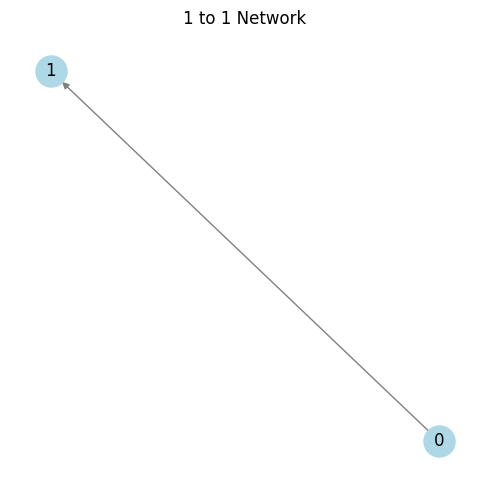

In [4]:
def create_N_to_1(N):
    network = nx.DiGraph()
    network.add_nodes_from(range(N))

    for i in range(N - 1):
        network.add_edge(i, N - 1)

    for node in network.nodes():
        network.nodes[node]['neuron'] = HodgkinHuxleyNeuron()

    return network
    

def plot_network(network, ax):
    pos = nx.spring_layout(network)
    nx.draw_networkx(network, pos, node_size=500, node_color="lightblue", edge_color="gray", arrows=True, ax=ax)
    ax.set_title(f"{len(network.nodes) - 1} to 1 Network")
    ax.axis("off")
    plt.tight_layout()


# Plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
Net2 = create_N_to_1(2)
plot_network(Net2, ax)

##### Simulation

In [5]:
def sim(network):
    T = 20.0
    dt = 0.01
    time = np.arange(0, T, dt)
    
    # Stimulus
    I = np.zeros(len(time))
    I[int(0.5/dt):int(1.0/dt)] = 15.0
    
    # Record Data
    V_record = {node: [] for node in network.nodes()}
    Network = network.nodes()
    
    for i, t in enumerate(time):
        for node in Network:
            neuron = Network[node]['neuron']
            I_temp = 0.0

            if node in range(len(Network) - 1):
                neuron.step(I[i])
                V_record[node].append(neuron.V)
            else:
                for pred in list(network.predecessors(node)):
                    parent = Network[pred]['neuron']
                    I_temp += I_syn(neuron.V, parent.V)
        
                neuron.step(I_temp)
                V_record[node].append(neuron.V)

    return V_record


def plot_sim(Vs, ax):
    for node, V in Vs.items():
        ax.plot(time / time[615], V, label=f'Neuron {node}')  # Change plt.plot to ax.plot
    
    ax.set_title("Membrane Potential")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (mV)")
    ax.legend() 

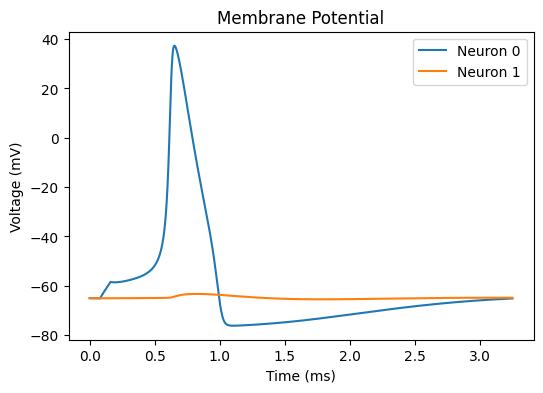

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
Vs = sim(Net2)
plot_sim(Vs, ax)

## Multiple Neurons

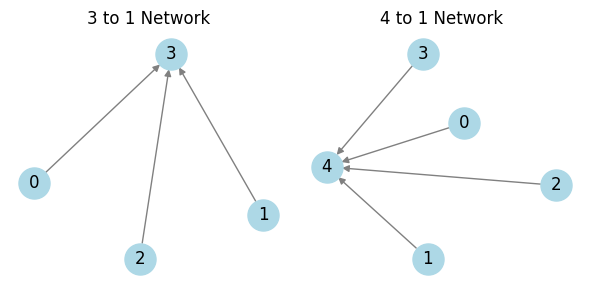

In [7]:
NetA = create_N_to_1(4)
NetB = create_N_to_1(5)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot_network(NetA, axes[0])
plot_network(NetB, axes[1])

##### Simulation

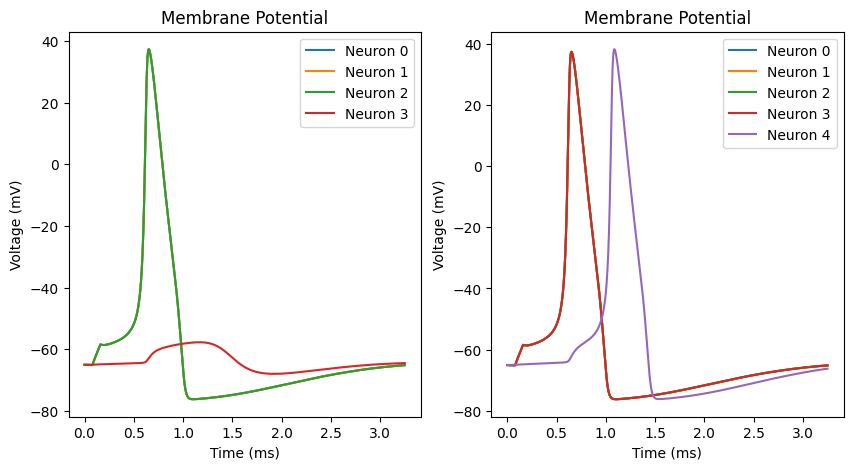

In [8]:
VsA = sim(NetA)
VsB = sim(NetB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_sim(VsA, axes[0])
plot_sim(VsB, axes[1])

##